In [ ]:
%%capture
!pip install qiskit==1.0.2
!pip install qiskit-ibm-runtime==0.23.0
!pip install qiskit_aer
!pip install pylatexenc

In [ ]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [ ]:
def get_counts(simulator, circuit, shots=1000):
    """Return the counts from running a circuit on the Aer."""
    job_statevector = simulator.run(circuit, shots=shots)
    counts = job_statevector.result().get_counts(0)
    return counts

In [ ]:
def plot_histogram(counts, title="Histogram", figsize=(7, 5)):
    """Plot a histogram of data from a counts dictionary."""
    if not os.path.exists("results"):
        os.makedirs("results")
    labels, values = zip(*sorted(counts.items()))
    plt.figure(figsize=figsize)
    plt.bar(labels, values, color="b")
    plt.xticks(rotation=90)
    plt.xlabel("State")
    plt.ylabel("Counts")
    plt.title(title)
    plt.show()

In [ ]:
def prepare_circuit():
    # Quantum registers
    a = QuantumRegister(4, name="a")
    b = QuantumRegister(2, name="b")
    scratch = QuantumRegister(2, name="scratch")
    c = ClassicalRegister(4, name="c")
    qc = QuantumCircuit(a, b, scratch, c)

    # Set initial states
    qc.x(a[0])  # Apply X gate to the 0th qubit in register a
    qc.h(a[2])  # Apply H gate to the 2nd qubit in register a
    qc.rz(math.pi / 4, a[2])  # RZ gate on a[2]
    qc.x(b[0])  # Apply X gate to the 0th qubit in register b
    qc.h(b[1])  # Apply H gate to the 1st qubit in register b
    qc.rz(math.pi / 2, b[1])  # RZ gate on b[1]

    # Addition logic
    qc.barrier(a, b, scratch)
    qc.ccx(b[0], a[0], scratch[0])
    qc.ccx(a[1], a[2], scratch[1])
    qc.ccx(scratch[0], scratch[1], a[3])
    qc.ccx(a[1], a[2], scratch[1])
    qc.ccx(b[0], a[0], scratch[0])
    qc.ccx(b[0], a[0], scratch[0])
    qc.ccx(scratch[0], a[1], a[2])
    qc.ccx(b[0], a[0], scratch[0])
    qc.ccx(b[0], a[0], a[1])
    qc.cx(b[0], a[0])
    qc.ccx(b[1], a[1], scratch[0])
    qc.ccx(scratch[0], a[2], a[3])
    qc.ccx(b[1], a[1], scratch[0])
    qc.ccx(b[1], a[1], a[2])
    qc.cx(b[1], a[1])

    print("Initial Circuit:")
    print(qc.draw())

    qc.measure_all()

    return qc

Initial Circuit:
           ┌───┐            ░                                              »
      a_0: ┤ X ├────────────░───■───────────────────■────■─────────■────■──»
           └───┘            ░   │                   │    │         │  ┌─┴─┐»
      a_1: ─────────────────░───┼────■─────────■────┼────┼────■────┼──┤ X ├»
           ┌───┐┌─────────┐ ░   │    │         │    │    │  ┌─┴─┐  │  └─┬─┘»
      a_2: ┤ H ├┤ Rz(π/4) ├─░───┼────■─────────■────┼────┼──┤ X ├──┼────┼──»
           └───┘└─────────┘ ░   │    │  ┌───┐  │    │    │  └─┬─┘  │    │  »
      a_3: ─────────────────░───┼────┼──┤ X ├──┼────┼────┼────┼────┼────┼──»
           ┌───┐            ░   │    │  └─┬─┘  │    │    │    │    │    │  »
      b_0: ┤ X ├────────────░───■────┼────┼────┼────■────■────┼────■────■──»
           ├───┤┌─────────┐ ░   │    │    │    │    │    │    │    │       »
      b_1: ┤ H ├┤ Rz(π/2) ├─░───┼────┼────┼────┼────┼────┼────┼────┼───────»
           └───┘└─────────┘ ░ ┌─┴─┐  │    │    │  ┌─┴─┐┌─┴─

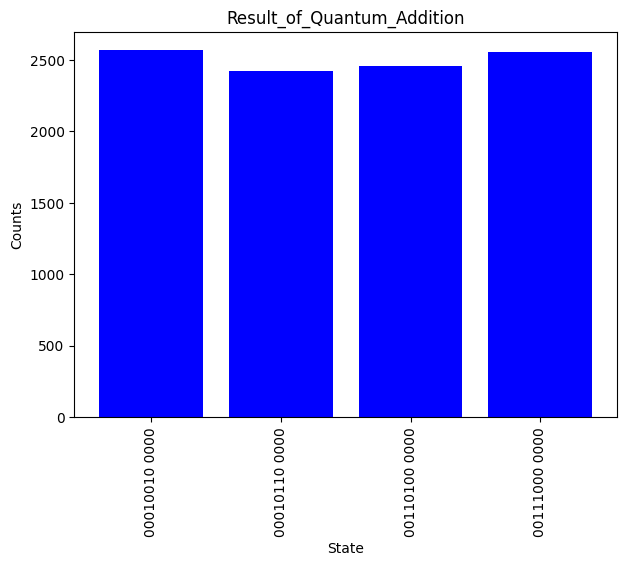

In [ ]:
simulator = AerSimulator(method="statevector")
shots = 10000

# Create and run the quantum circuit
qc = prepare_circuit()
counts = get_counts(simulator, qc, shots=shots)
print("Final counts:", counts)
plot_histogram(counts, title="Result_of_Quantum_Addition")